<table style="width:100%">
  <tr>
    <th align="center">
    <h1 align="center">Laboratorio 4</h1>
    <h2 align="center">Estadistica Computacional</h2>
    <h3 align="center">Diego Zamora 201473076-4</h3>
    <h3 align="center">Juan Pablo León 201473047-0</h3>
    </th> 
  </tr>

# 1.- Método de Muestreo: Bootstrapping

In [57]:
import random 
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

1.- Escritura del algoritmo the bootstrapping con reemplazo, para $R$ remuestreos de una muestra $X$:

In [90]:
def bootstrapping(R, X):
    muestraSize = len(X)
    muestras = []
    muestraTemp = []
    
    # remuestreo
    for i in range(R):
        muestraTemp = []
        for j in range(muestraSize):
            index = random.randint(0, muestraSize-1)
            muestraTemp.append(X[index])
        muestras.append(muestraTemp)
    
    
    # calculo de las medias
    medias = []
    for i in range(R):
        medias.append(np.mean(muestras[i]))
    
    return medias
    
#R = 10
#X = [1,2,3,4,5,6,7,8,9]
#a = bootstrapping(R,X)



2.- Descripción de la población _population.csv_:
* Cantidad de individuos: 450.
* Media de notas para cada asignatura: 

In [74]:
poblacion = pd.read_csv("population.csv",converters={"":int, "math score":int, 
                                                     "reading score":int, "writing score": int})

mediaMate = np.mean(poblacion['math score'])
mediaLectura = np.mean(poblacion['reading score'])
mediaEscritura = np.mean(poblacion['writing score'])

print("Nota media en matemáticas: " + str(round(mediaMate,1)))
print("Nota media en lectura: " + str(round(mediaLectura,1)))
print("Nota media en escritura: " + str(round(mediaEscritura,1)))

Nota media en matemáticas: 66.2
Nota media en lectura: 69.8
Nota media en escritura: 68.9


* Histogramas de notas para cada asignatura:

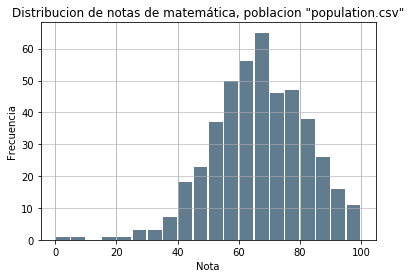

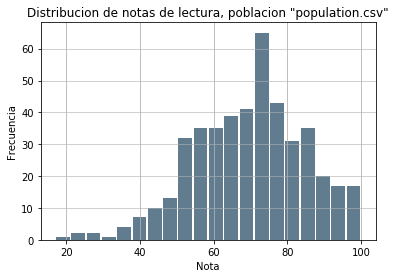

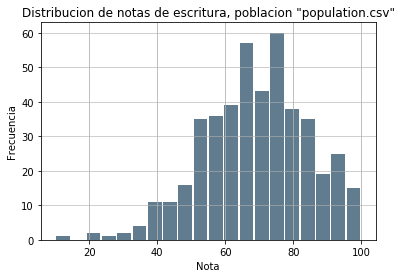

In [81]:
plt.figure(1)
poblacion['math score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de matemática, poblacion "population.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(2)
poblacion['reading score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de lectura, poblacion "population.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(3)
poblacion['writing score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de escritura, poblacion "population.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


3.- Descripción de la muestra _sample.csv_:
* Cantidad de individuos: 45.
* Medias de notas para cada asignatura:

In [75]:
poblacionSample = pd.read_csv("sample.csv",converters={"":int, "math score":int, 
                                                     "reading score":int, "writing score": int})

mediaMateSample = np.mean(poblacionSample['math score'])
mediaLecturaSample = np.mean(poblacionSample['reading score'])
mediaEscrituraSample = np.mean(poblacionSample['writing score'])

print("Nota media en matemáticas: " + str(round(mediaMateSample,1)))
print("Nota media en lectura: " + str(round(mediaLecturaSample,1)))
print("Nota media en escritura: " + str(round(mediaEscrituraSample,1)))

Nota media en matemáticas: 64.2
Nota media en lectura: 66.2
Nota media en escritura: 66.1


* Histogramas de notas para cada asignatura:

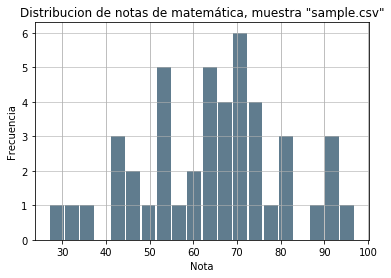

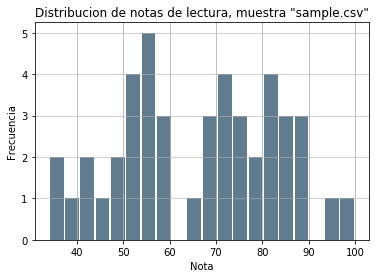

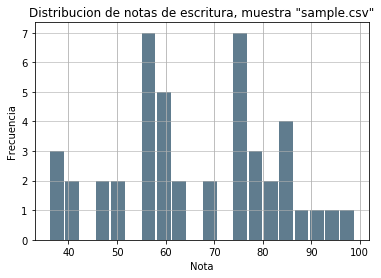

In [82]:
plt.figure(4)
poblacionSample['math score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de matemática, muestra "sample.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(5)
poblacionSample['reading score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de lectura, muestra "sample.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(6)
poblacionSample['writing score'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribucion de notas de escritura, muestra "sample.csv"')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

4.- Determinamos el valor de $R$ lo suficientemente grande (para la asignatura de matemática):
* Obtenemos la distribución de la media utilizando nuestro algoritmo de _bootstrapping_:

In [100]:
R = [1, 5, 25, 100, 1000]
distribucionesMedia = []
for i in R:
    distribucionesMedia.append(bootstrapping(i, poblacion['math score']))

* Graficamos las distribuciones de la media en histogramas:

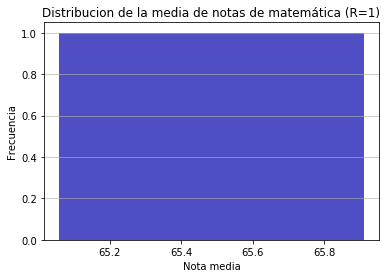

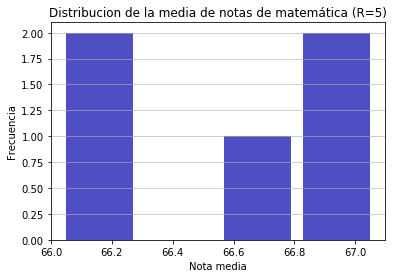

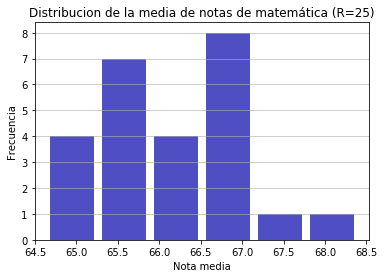

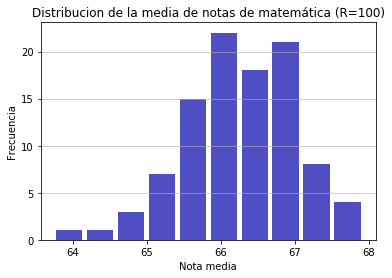

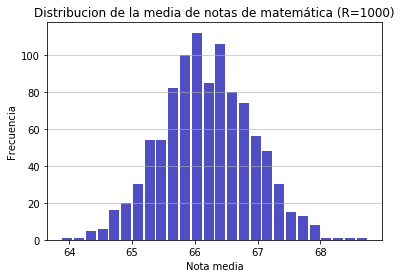

In [121]:
# R=1
plt.figure(7)
n, bins, patches = plt.hist(x=distribucionesMedia[0], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=1)')
plt.show()

# R=5
plt.figure(8)
n, bins, patches = plt.hist(x=distribucionesMedia[1], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=5)')
plt.show()

# R=25
plt.figure(9)
n, bins, patches = plt.hist(x=distribucionesMedia[2], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=25)')
plt.show()

# R=100
plt.figure(10)
n, bins, patches = plt.hist(x=distribucionesMedia[3], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=100)')
plt.show()

# R=1000
plt.figure(11)
n, bins, patches = plt.hist(x=distribucionesMedia[4], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Nota media')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la media de notas de matemática (R=1000)')
plt.show()

* 

5.-